Testing the vehicle2d class


In [1]:
from vehicle2d_single_track import *

x = vehicle2d_single_track()

x.wheel_base

3.075

In [2]:
x.front_tire

In [3]:
x.front_tire.longitudinal_force

100

In [4]:
x.front_wheel_angle

0

Test the matplotlib-based 2d vehicle diagram drawing

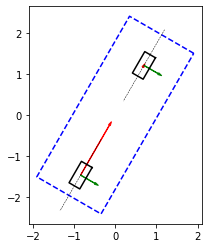

In [5]:
x.draw_vehicle()

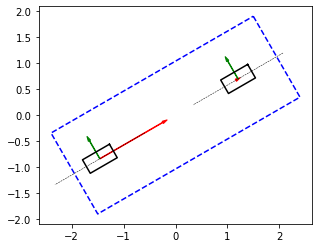

In [6]:
x.draw_vehicle(z_up=1)

In [7]:
y = vehicle2d_single_track(whl_ang_frnt=0.2)

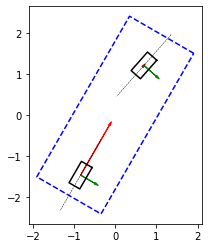

In [8]:
y.draw_vehicle(save_fig=1)

In [9]:
# plt.savefig('vehicle_example.eps', format='eps')